<dev dir="rtl" >

## نظریه بازی ها
#### تمرین شماره ۳
## آریا رادمهر
## شماره دانشحویی : ۹۷۴۶۳۱۲۵

In [ ]:
import pandas as pd
import math
import pandas_datareader as web
import datetime as dt
import numpy as np

In [ ]:
df = pd.read_csv('TrainSaderat.csv')

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>
0,20090609,1002,1031.0
1,20090610,1031,1025.0
2,20090613,1025,1026.0
3,20090614,1026,1026.0
4,20090615,1026,1026.0


In [ ]:
df['Date'] = pd.to_datetime(df['<DTYYYYMMDD>'],format='%Y%m%d')
all_date = list(df['Date'])
all_date = pd.Series(all_date).array

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>,Date
0,20090609,1002,1031.0,2009-06-09
1,20090610,1031,1025.0,2009-06-10
2,20090613,1025,1026.0,2009-06-13
3,20090614,1026,1026.0,2009-06-14
4,20090615,1026,1026.0,2009-06-15


In [ ]:
!pip install persiantools

In [ ]:
from persiantools.jdatetime import JalaliDate
def day(jdate):
  return JalaliDate(jdate).isoweekday()
def month(jdate):
  return JalaliDate(jdate).month
def weekofyear(jdate):
  return JalaliDate(jdate).week_of_year()
df['day'] = df['Date'].map(day)
df['month'] = df['Date'].map(month)
df['weekofyear'] = df['Date'].map(weekofyear)

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>,Date,day,month,weekofyear
0,20090609,1002,1031.0,2009-06-09,4,3,12
1,20090610,1031,1025.0,2009-06-10,5,3,12
2,20090613,1025,1026.0,2009-06-13,1,3,13
3,20090614,1026,1026.0,2009-06-14,2,3,13
4,20090615,1026,1026.0,2009-06-15,3,3,13


In [ ]:
df['48ha'] = df['<TARGET>'].rolling(window=2,min_periods=0).mean()

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>,Date,day,month,weekofyear,48ha
0,20090609,1002,1031.0,2009-06-09,4,3,12,1031.0
1,20090610,1031,1025.0,2009-06-10,5,3,12,1028.0
2,20090613,1025,1026.0,2009-06-13,1,3,13,1025.5
3,20090614,1026,1026.0,2009-06-14,2,3,13,1026.0
4,20090615,1026,1026.0,2009-06-15,3,3,13,1026.0


In [ ]:
df['72ha'] = df['<TARGET>'].rolling(window=3,min_periods=0).mean()

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>,Date,day,month,weekofyear,48ha,72ha
0,20090609,1002,1031.0,2009-06-09,4,3,12,1031.0,1031.000000
1,20090610,1031,1025.0,2009-06-10,5,3,12,1028.0,1028.000000
2,20090613,1025,1026.0,2009-06-13,1,3,13,1025.5,1027.333333
3,20090614,1026,1026.0,2009-06-14,2,3,13,1026.0,1025.666667
4,20090615,1026,1026.0,2009-06-15,3,3,13,1026.0,1026.000000


In [ ]:
df['pwa'] = df['<TARGET>'].rolling(window=5,min_periods=0).mean()

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>,Date,day,month,weekofyear,48ha,72ha,pwa
0,20090609,1002,1031.0,2009-06-09,4,3,12,1031.0,1031.000000,1031.000000
1,20090610,1031,1025.0,2009-06-10,5,3,12,1028.0,1028.000000,1028.000000
2,20090613,1025,1026.0,2009-06-13,1,3,13,1025.5,1027.333333,1027.333333
3,20090614,1026,1026.0,2009-06-14,2,3,13,1026.0,1025.666667,1027.000000
4,20090615,1026,1026.0,2009-06-15,3,3,13,1026.0,1026.000000,1026.800000


In [ ]:
df['pma'] = df['<TARGET>'].rolling(window=30,min_periods=0).mean()

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>,Date,day,month,weekofyear,48ha,72ha,pwa,pma
0,20090609,1002,1031.0,2009-06-09,4,3,12,1031.0,1031.000000,1031.000000,1031.000000
1,20090610,1031,1025.0,2009-06-10,5,3,12,1028.0,1028.000000,1028.000000,1028.000000
2,20090613,1025,1026.0,2009-06-13,1,3,13,1025.5,1027.333333,1027.333333,1027.333333
3,20090614,1026,1026.0,2009-06-14,2,3,13,1026.0,1025.666667,1027.000000,1027.000000
4,20090615,1026,1026.0,2009-06-15,3,3,13,1026.0,1026.000000,1026.800000,1026.800000


In [ ]:
df['isWeekend'] = np.nan
df['isStartOfWeek'] = np.nan

In [ ]:
for k in range(len(df)):
  weekno = df['Date'][k].weekday()
  df['day'][k] = weekno
  if weekno < 5:
    df['isWeekend'][k] = 0
  else: 
    df['isWeekend'][k] = 1

  if weekno == 0:
    df['isStartOfWeek'][k] = 1
  else:
    df['isStartOfWeek'][k] = 0

In [ ]:
df.head()

,<DTYYYYMMDD>,<HIGH>,<TARGET>,Date,day,month,weekofyear,48ha,72ha,pwa,pma,isWeekend,isStartOfWeek
0,20090609,1002,1031.0,2009-06-09,1,3,12,1031.0,1031.000000,1031.000000,1031.000000,0.0,0.0
1,20090610,1031,1025.0,2009-06-10,2,3,12,1028.0,1028.000000,1028.000000,1028.000000,0.0,0.0
2,20090613,1025,1026.0,2009-06-13,5,3,13,1025.5,1027.333333,1027.333333,1027.333333,1.0,0.0
3,20090614,1026,1026.0,2009-06-14,6,3,13,1026.0,1025.666667,1027.000000,1027.000000,1.0,0.0
4,20090615,1026,1026.0,2009-06-15,0,3,13,1026.0,1026.000000,1026.800000,1026.800000,0.0,1.0


<dev dir="rtl" >

# دیتا فریم کلی که شامل ۱۱ ستون میباشد.

In [ ]:
df = df[['<HIGH>','<TARGET>','day','month','weekofyear','48ha','72ha','pwa','pma','isWeekend','isStartOfWeek']]

In [ ]:
df.head()

,<HIGH>,<TARGET>,day,month,weekofyear,48ha,72ha,pwa,pma,isWeekend,isStartOfWeek
0,1002,1031.0,1,3,12,1031.0,1031.000000,1031.000000,1031.000000,0.0,0.0
1,1031,1025.0,2,3,12,1028.0,1028.000000,1028.000000,1028.000000,0.0,0.0
2,1025,1026.0,5,3,13,1025.5,1027.333333,1027.333333,1027.333333,1.0,0.0
3,1026,1026.0,6,3,13,1026.0,1025.666667,1027.000000,1027.000000,1.0,0.0
4,1026,1026.0,0,3,13,1026.0,1026.000000,1026.800000,1026.800000,0.0,1.0


In [ ]:
cols = list(df)[0:11]

In [ ]:
dataset_train = df[cols].astype(str)

In [ ]:
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

In [ ]:
dataset_train = dataset_train.astype(float)
training_set = dataset_train.values 
training_set[:20]

array([[1.00200000e+03, 1.03100000e+03, 1.00000000e+00, 3.00000000e+00,
        1.20000000e+01, 1.03100000e+03, 1.03100000e+03, 1.03100000e+03,
        1.03100000e+03, 0.00000000e+00, 0.00000000e+00],
       [1.03100000e+03, 1.02500000e+03, 2.00000000e+00, 3.00000000e+00,
        1.20000000e+01, 1.02800000e+03, 1.02800000e+03, 1.02800000e+03,
        1.02800000e+03, 0.00000000e+00, 0.00000000e+00],
       [1.02500000e+03, 1.02600000e+03, 5.00000000e+00, 3.00000000e+00,
        1.30000000e+01, 1.02550000e+03, 1.02733333e+03, 1.02733333e+03,
        1.02733333e+03, 1.00000000e+00, 0.00000000e+00],
       [1.02600000e+03, 1.02600000e+03, 6.00000000e+00, 3.00000000e+00,
        1.30000000e+01, 1.02600000e+03, 1.02566667e+03, 1.02700000e+03,
        1.02700000e+03, 1.00000000e+00, 0.00000000e+00],
       [1.02600000e+03, 1.02600000e+03, 0.00000000e+00, 3.00000000e+00,
        1.30000000e+01, 1.02600000e+03, 1.02600000e+03, 1.02680000e+03,
        1.02680000e+03, 0.00000000e+00, 1.00000000e+

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_train_data = scaler.fit_transform(training_set)

Scaled_pred_data = StandardScaler()
Scaled_pred_data.fit_transform(training_set[:, 0:1])

array([[-0.42437243],
       [-0.38532392],
       [-0.39340292],
       ...,
       [ 0.49528738],
       [ 0.43469486],
       [ 0.49259438]])

In [ ]:
train_x = []  
train_y = []

train_lengh = 2174  
test_lengh = 126

In [ ]:
for i in range(train_lengh, len(Scaled_train_data) - test_lengh +1):
    train_x.append(Scaled_train_data[i - train_lengh:i, 0:dataset_train.shape[1] - 1])
    train_y.append(Scaled_train_data[i + test_lengh - 1:i + test_lengh, 0])

train_x, train_y = np.array(train_x), np.array(train_y)

In [ ]:
train_x

array([[[-0.42437243, -0.32945321, -0.77511352, ..., -0.33110859,
         -0.34321494, -0.81481481],
        [-0.38532392, -0.33762067, -0.34382329, ..., -0.33520581,
         -0.34742106, -0.81481481],
        [-0.39340292, -0.33625943,  0.9500474 , ..., -0.3361163 ,
         -0.34835575,  1.22727273],
        ...,
        [ 2.22554047,  2.47334491, -1.20640376, ...,  2.1777526 ,
          3.37452814, -0.81481481],
        [ 2.38712053,  2.66391884, -0.77511352, ...,  2.32252086,
          3.31891388, -0.81481481],
        [ 2.57563059,  2.88171763, -0.34382329, ...,  2.50279831,
          3.28059145, -0.81481481]],

       [[-0.38532392, -0.33762067, -0.34382329, ..., -0.33520581,
         -0.34742106, -0.81481481],
        [-0.39340292, -0.33625943,  0.9500474 , ..., -0.3361163 ,
         -0.34835575,  1.22727273],
        [-0.39205642, -0.33625943,  1.38133763, ..., -0.33657154,
         -0.3488231 ,  1.22727273],
        ...,
        [ 2.38712053,  2.66391884, -0.77511352, ...,  

In [ ]:
train_y

array([[0.87096101],
       [1.02446206],
       [0.97194855],
       [0.849417  ],
       [0.91943503],
       [1.00022505],
       [0.98406705],
       [1.02042256],
       [1.09851959],
       [1.16449811],
       [1.28029715],
       [1.32338517],
       [1.32069216],
       [1.29645516],
       [1.36916618],
       [1.4203332 ],
       [1.36378018],
       [1.33819667],
       [1.28299015],
       [1.22913013],
       [1.28299015],
       [1.29645516],
       [1.23990214],
       [1.22239763],
       [1.31530616],
       [1.35704768],
       [1.36108718],
       [1.38667069],
       [1.30049466],
       [1.08505458],
       [1.1214101 ],
       [1.09851959],
       [1.06755008],
       [1.08370808],
       [1.02715506],
       [1.01369006],
       [1.09717309],
       [1.18738862],
       [1.21701163],
       [1.29510866],
       [1.31530616],
       [1.40686819],
       [1.53882524],
       [1.62230827],
       [1.7273353 ],
       [1.79735333],
       [1.94277538],
       [2.023

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout

In [ ]:
model = Sequential()

model.add(LSTM(units=128, return_sequences=True, input_shape=(train_lengh, dataset_train.shape[1]-1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

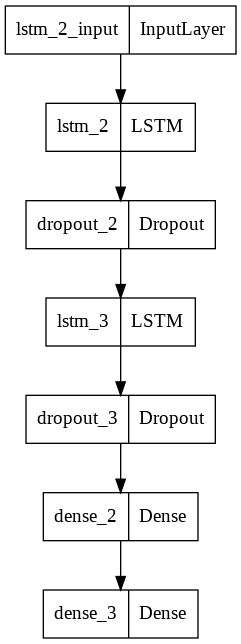

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2174, 128)         71168     
                                                                 
 dropout_2 (Dropout)         (None, 2174, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 202,883
Trainable params: 202,883
Non-tr

<dev dir="rtl" >

# شروع train بر روی دیتا

In [ ]:
trained_model = model.fit(train_x, train_y, shuffle=True, epochs=30,  verbose=1, batch_size=8)

Epoch 1/30
16/16 [==============================] - 12s 533ms/step - loss: 0.2192
Epoch 2/30
16/16 [==============================] - 8s 531ms/step - loss: 0.0648
Epoch 3/30
16/16 [==============================] - 9s 531ms/step - loss: 0.0554
Epoch 4/30
16/16 [==============================] - 8s 530ms/step - loss: 0.0649
Epoch 5/30
16/16 [==============================] - 8s 531ms/step - loss: 0.0505
Epoch 6/30
16/16 [==============================] - 9s 532ms/step - loss: 0.0488
Epoch 7/30
16/16 [==============================] - 8s 530ms/step - loss: 0.0583
Epoch 8/30
16/16 [==============================] - 8s 531ms/step - loss: 0.0654
Epoch 9/30
16/16 [==============================] - 9s 532ms/step - loss: 0.0547
Epoch 10/30
16/16 [==============================] - 9s 532ms/step - loss: 0.0576
Epoch 11/30
16/16 [==============================] - 8s 531ms/step - loss: 0.0464
Epoch 12/30
16/16 [==============================] - 8s 531ms/step - loss: 0.0482
Epoch 13/30
16/16 [=====

In [ ]:
datelist_future = pd.date_range(all_date[-1], periods=test_lengh, freq='1d').tolist()

datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
predict = model.predict(train_x[-test_lengh:])
predict

array([[0.8289045 ],
       [0.84887725],
       [0.86040837],
       [0.88052726],
       [0.9119224 ],
       [0.9618559 ],
       [1.0163263 ],
       [1.0555042 ],
       [1.0937227 ],
       [1.1308092 ],
       [1.1747931 ],
       [1.2154158 ],
       [1.2376655 ],
       [1.2544777 ],
       [1.2681026 ],
       [1.285954  ],
       [1.2991742 ],
       [1.2997843 ],
       [1.2957302 ],
       [1.286403  ],
       [1.2794139 ],
       [1.2702276 ],
       [1.2502848 ],
       [1.2236745 ],
       [1.1934549 ],
       [1.1705786 ],
       [1.1509894 ],
       [1.1185722 ],
       [1.0830758 ],
       [1.0512136 ],
       [1.0348426 ],
       [1.0265614 ],
       [1.0126799 ],
       [1.0111661 ],
       [1.0314602 ],
       [1.0787499 ],
       [1.1373655 ],
       [1.2098327 ],
       [1.3016764 ],
       [1.4168848 ],
       [1.5378975 ],
       [1.645131  ],
       [1.727916  ],
       [1.7929904 ],
       [1.8443266 ],
       [1.8807715 ],
       [1.9054683 ],
       [1.905

In [ ]:
y_pred_future = Scaled_pred_data.inverse_transform(predict)
predict = pd.DataFrame(y_pred_future, columns=['<TARGET>']).set_index(pd.Series(datelist_future))

In [ ]:
pd.DataFrame(y_pred_future, columns=['Target'])

,Target
0,1932.766113
1,1947.599121
2,1956.162964
3,1971.104492
4,1994.420654
...,...
121,1627.922363
122,1618.481079
123,1607.782349
124,1599.897583


In [ ]:
compare = pd.read_csv("comparision.csv" , header=0)

In [ ]:
compare.head()

,C
0,2078
1,2039
2,1948
3,2000
4,2060


<dev dir="rtl" >

# مقدار RMSE:

In [ ]:
from sklearn.metrics import mean_squared_error 
y_true = compare['C']
y_pred = y_pred_future

rmse =  math.sqrt(mean_squared_error(y_true, y_pred))
rmse

69.7700052419961

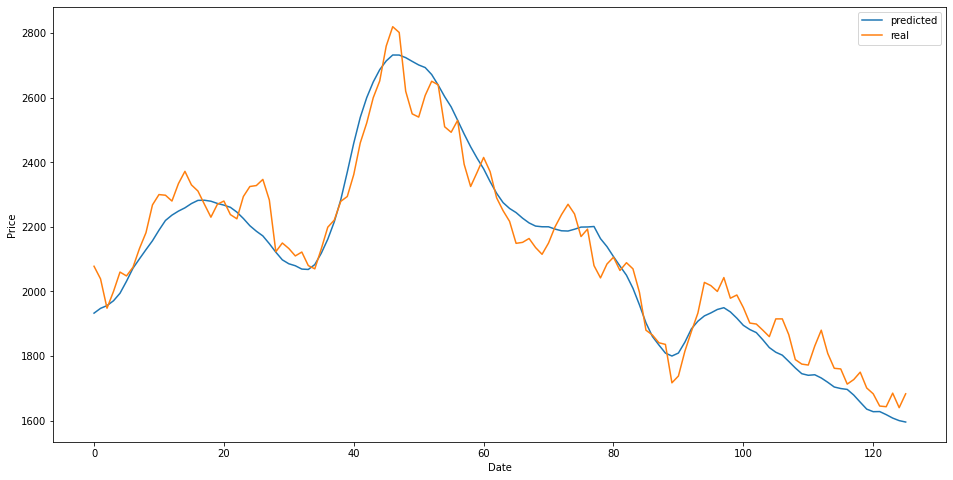

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(y_pred, label="predicted")
plt.plot(compare['C'], label="real")
plt.xlabel("Date")
plt.ylabel("Price")
#plt.savefig('plt1.png')
plt.legend()
plt.show()